<a href="https://colab.research.google.com/github/vedb1211/Realtime-Player-Sentiment-Analysis-/blob/main/Crowd_Expressions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import tensorflow as tf
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator,array_to_img
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout
from tensorflow.keras.metrics import CategoricalAccuracy, Precision, Recall, Accuracy
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import zipfile
import random
from PIL import Image

In [ ]:
# getting the data from directory and performing data augmentation only on training data
train_datagen=ImageDataGenerator(
    rescale=1./255., # rescaling the images
    rotation_range=10, # rotating the image by 40 degrees
    width_shift_range=0.1, # shifting the image +-(20%) of original width
    height_shift_range=0.1, # shifting the image +-(20%) of original height
    # shear_range=0.2, # shearing the image by 20% of image
    # zoom_range=0.2, # zooming the image 20%
    # validation_split=0.2,# splitting train data into train and validation set with 8:2 ratio
    horizontal_flip=True, # horizontaly flipping the image
    vertical_flip=True # vertically flipping the image
)

In [ ]:
!unzip crowd_data_new.zip

Streaming output truncated to the last 5000 lines.
 extracting: crowd_data/sad/10588.jpg  
 extracting: crowd_data/sad/10589.jpg  
 extracting: crowd_data/sad/10613.jpg  
 extracting: crowd_data/sad/10618.jpg  
 extracting: crowd_data/sad/10631.jpg  
 extracting: crowd_data/sad/10632.jpg  
 extracting: crowd_data/sad/10637.jpg  
 extracting: crowd_data/sad/10642.jpg  
 extracting: crowd_data/sad/10645.jpg  
 extracting: crowd_data/sad/10648.jpg  
 extracting: crowd_data/sad/10650.jpg  
 extracting: crowd_data/sad/10657.jpg  
 extracting: crowd_data/sad/10658.jpg  
 extracting: crowd_data/sad/10659.jpg  
 extracting: crowd_data/sad/10663.jpg  
 extracting: crowd_data/sad/10665.jpg  
 extracting: crowd_data/sad/10669.jpg  
 extracting: crowd_data/sad/1067.jpg  
 extracting: crowd_data/sad/10670.jpg  
 extracting: crowd_data/sad/10671.jpg  
 extracting: crowd_data/sad/10675.jpg  
 extracting: crowd_data/sad/10679.jpg  
 extracting: crowd_data/sad/10688.jpg  
 extracting: crowd_data/sad/10

In [ ]:
train_data = train_datagen.flow_from_directory(
    "/content/crowd_data",
    class_mode = 'binary',
    target_size = (150,150),
    subset='training'
)

Found 10444 images belonging to 2 classes.


In [ ]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), input_shape=(150, 150, 3), activation='relu', padding="same"),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding="same"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding="same"),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding="same"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=1, activation="sigmoid")
],name = 'model3')

model3.compile(optimizer = Adam(learning_rate=0.01),
              loss = 'binary_crossentropy',
              metrics = ['accuracy', Precision(), Recall()])
# Get the summary
model3.summary()

# Fit the model
history=model3.fit(
    train_data,
    epochs=50
)


Model: "model3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 64)      18496     
                                                                 
 dropout (Dropout)           (None, 150, 150, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 64)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 75, 75, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 32)        18464

In [ ]:
!unzip crowd.zip

In [ ]:
test_datagen=ImageDataGenerator(rescale=1./255.,
                                width_shift_range=0.2, # shifting the image +-(20%) of original width
    height_shift_range=0.2, # shifting the image +-(20%) of original height
    shear_range=0.2, # shearing the image by 20% of image
    zoom_range=0.2 # zooming the image 20%
)
test_path = "/content/crowd"
test_data = test_datagen.flow_from_directory(
    test_path,
    batch_size = 128,
    class_mode = 'binary',
    target_size = (150,150)
)

Found 406 images belonging to 2 classes.


In [ ]:
loss_1, accuracy_1, precision_1, recall_1 = model3.evaluate(test_data)
print('Loss of Model1 on test data: ',loss_1)
print('Accuracy of Model1 on test data: ',accuracy_1)
print('Precision of Model1 on test data: ',precision_1)
print('Recall of Model1 on test data: ',recall_1)


4/4 [==============================] - 5s 518ms/step - loss: 0.7093 - accuracy: 0.5369 - precision: 0.4206 - recall: 0.7162
Loss of Model1 on test data:  0.7093093395233154
Accuracy of Model1 on test data:  0.5369458198547363
Precision of Model1 on test data:  0.420634925365448
Recall of Model1 on test data:  0.7162162065505981


In [ ]:
k

1/1 [==============================] - 0s 26ms/step
The image is classified as: Happy
[[1.]]


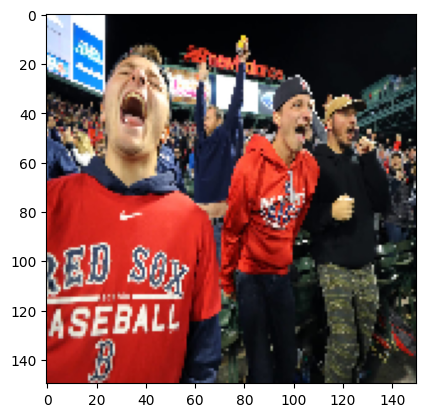

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input
import numpy as np

# Load your custom image
img_path = "/content/crowd/sad/annoying-fan-bases-sports.jpg"  # Replace with your image file path
img = image.load_img(img_path, target_size=(150, 150)) # Make sure the target size matches your input shape
plt.imshow(img)
x = image.img_to_array(img)
x = preprocess_input(x)
x = np.expand_dims(x, axis=0)
# Add batch dimension

# prediction = model1.predict(x)
prediction = model3.predict(x)

# Interpret the prediction
if prediction[0][0] > 0.5:
    predicted_class = "Happy"
else:
    predicted_class = "Sad"

print(f"The image is classified as: {predicted_class}")
print(prediction)

In [ ]:
model3.save("Crowd_model3.h5")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from google.colab import files
files.download("Crowd_model3.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import tensorflow as tf

model101 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(150, 150, 3), name='input'),

    # 1st block
    tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same', name='conv1_1'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same', name='conv1_2'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), name='pool1_1'),
    tf.keras.layers.Dropout(0.3, name='drop1_1'),

    # 2nd block
    tf.keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding='same', name='conv2_1'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding='same', name='conv2_2'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding='same', name='conv2_3'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), name='pool2_1'),
    tf.keras.layers.Dropout(0.3, name='drop2_1'),

    # 3rd block
    tf.keras.layers.Conv2D(256, kernel_size=3, activation='relu', padding='same', name='conv3_1'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, kernel_size=3, activation='relu', padding='same', name='conv3_2'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, kernel_size=3, activation='relu', padding='same', name='conv3_3'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, kernel_size=3, activation='relu', padding='same', name='conv3_4'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), name='pool3_1'),
    tf.keras.layers.Dropout(0.3, name='drop3_1'),

    # 4th block
    tf.keras.layers.Conv2D(256, kernel_size=3, activation='relu', padding='same', name='conv4_1'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, kernel_size=3, activation='relu', padding='same', name='conv4_2'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, kernel_size=3, activation='relu', padding='same', name='conv4_3'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, kernel_size=3, activation='relu', padding='same', name='conv4_4'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), name='pool4_1'),
    tf.keras.layers.Dropout(0.3, name='drop4_1'),

    # 5th block
    tf.keras.layers.Conv2D(512, kernel_size=3, activation='relu', padding='same', name='conv5_1'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(512, kernel_size=3, activation='relu', padding='same', name='conv5_2'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(512, kernel_size=3, activation='relu', padding='same', name='conv5_3'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(512, kernel_size=3, activation='relu', padding='same', name='conv5_4'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), name='pool5_1'),
    tf.keras.layers.Dropout(0.3, name='drop5_1'),

    # Flatten and output
    tf.keras.layers.Flatten(name='flatten'),
    tf.keras.layers.Dense(1, activation='sigmoid', name='output')
], name='model101')


model101.compile(optimizer = Adam(learning_rate=0.01),
              loss = 'binary_crossentropy',
              metrics = ['accuracy', Precision(), Recall()])
# Get the summary
model101.summary()

# Fit the model
history=model101.fit(
    train_data,
    epochs=50
)

Model: "model101"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1_1 (Conv2D)            (None, 150, 150, 64)      1792      
                                                                 
 batch_normalization_38 (Ba  (None, 150, 150, 64)      256       
 tchNormalization)                                               
                                                                 
 conv1_2 (Conv2D)            (None, 150, 150, 64)      36928     
                                                                 
 batch_normalization_39 (Ba  (None, 150, 150, 64)      256       
 tchNormalization)                                               
                                                                 
 pool1_1 (MaxPooling2D)      (None, 75, 75, 64)        0         
                                                                 
 drop1_1 (Dropout)           (None, 75, 75, 64)        0  

1/1 [==============================] - 0s 20ms/step
The image is classified as: Sad
[[0.36140767]]


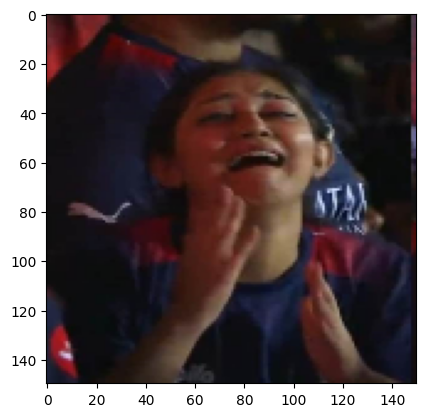

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.applications.inception_v3 import preprocess_input

# Load your custom image
img_path = "/content/rcb-fan-meme-ipl-16811919333x2m.png"  # Replace with your image file path
img = image.load_img(img_path, target_size=(150, 150)) # Make sure the target size matches your input shape
plt.imshow(img)
x = image.img_to_array(img)
x = preprocess_input(x)
x = np.expand_dims(x, axis=0)
# Add batch dimension

# prediction = model1.predict(x)
prediction = model101.predict(x)

# Interpret the prediction
if prediction[0][0] > 0.5:
    predicted_class = "Happy"
else:
    predicted_class = "Sad"

print(f"The image is classified as: {predicted_class}")
print(prediction)

In [ ]:
model101.save("Crowd_model101.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
